<a href="https://colab.research.google.com/github/abhishekghosh976/Stock-Price-Prediction-LSTM/blob/main/Stock_Price_Prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving TSLA.csv to TSLA.csv


In [3]:
import pandas as pd


df = pd.read_csv("TSLA.csv")

df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [6]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler


data = df[['Close']]


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

look_back = 60

x_train = []
y_train = []

for i in range(look_back, len(scaled_data)):
    x_train.append(scaled_data[i-look_back:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


print("Sample x_train[0]:", x_train[0].flatten())
print("Sample y_train[0]:", y_train[0])


x_train shape: (2356, 60, 1)
y_train shape: (2356,)
Sample x_train[0]: [0.01058623 0.01050772 0.00806072 0.0044491  0.00040565 0.
 0.0021722  0.00209369 0.0016357  0.00306202 0.00528657 0.005352
 0.00633342 0.00799529 0.00588851 0.00578382 0.0068045  0.00718398
 0.00673907 0.00621565 0.0064381  0.00595394 0.00541743 0.00669982
 0.00804763 0.00714473 0.0060848  0.00495943 0.00497252 0.00422664
 0.00274797 0.0023554  0.00329757 0.0038995  0.00438367 0.00388642
 0.00391259 0.00431824 0.00566605 0.0044491  0.00536509 0.0051688
 0.00510338 0.00532583 0.00481549 0.0060848  0.00688301 0.00686993
 0.00620257 0.00667365 0.00642502 0.0057184  0.0064381  0.00696153
 0.00808689 0.00672599 0.00579691 0.00688301 0.00650353 0.00532583]
Sample y_train[0]: 0.004920176655325834


In [7]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.fit(x_train, y_train, epochs=20, batch_size=32)


Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 0.0152
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0011
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0013
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0012
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 9.7425e-04
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 9.9989e-04
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 8.4133e-04
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 8.7949e-04
Epoch 9/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 7.0180e-04
Epoch 10/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 6.7792e-04
Epoch 11/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 6.6777e-04
Epoch 12/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 7.6905e-04
Epoch 13/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 5.8459e-04
Epoch 14/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 6.3948e-04
Epoch 15/20
74/74 ━━━━━━━━━━━━━

In [10]:
test_inputs = scaled_data[-(look_back + 30):]

x_test = []
for i in range(look_back, len(test_inputs)):
    x_test.append(test_inputs[i-look_back:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


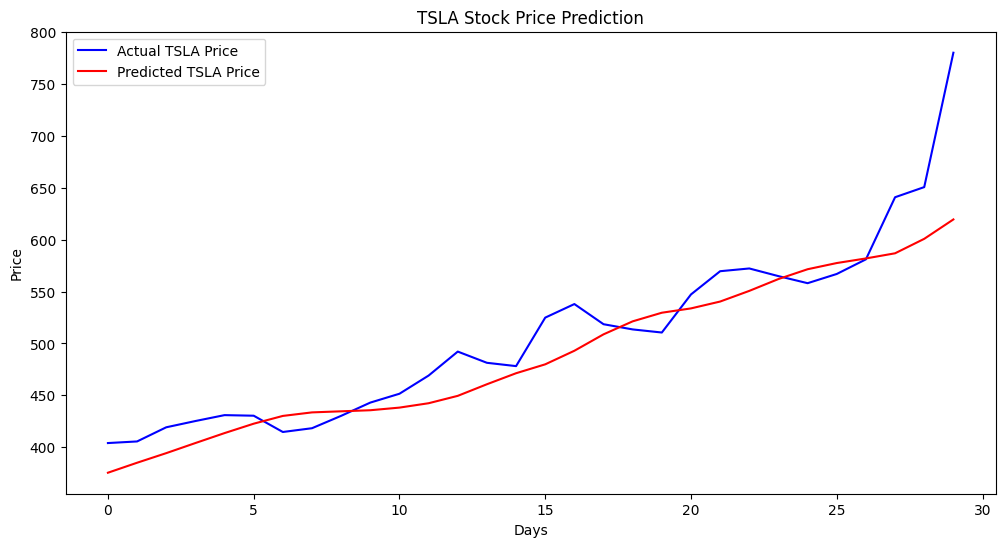

In [11]:
import matplotlib.pyplot as plt

actual_prices = data[-30:].values

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, color='blue', label='Actual TSLA Price')
plt.plot(predictions, color='red', label='Predicted TSLA Price')
plt.title('TSLA Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


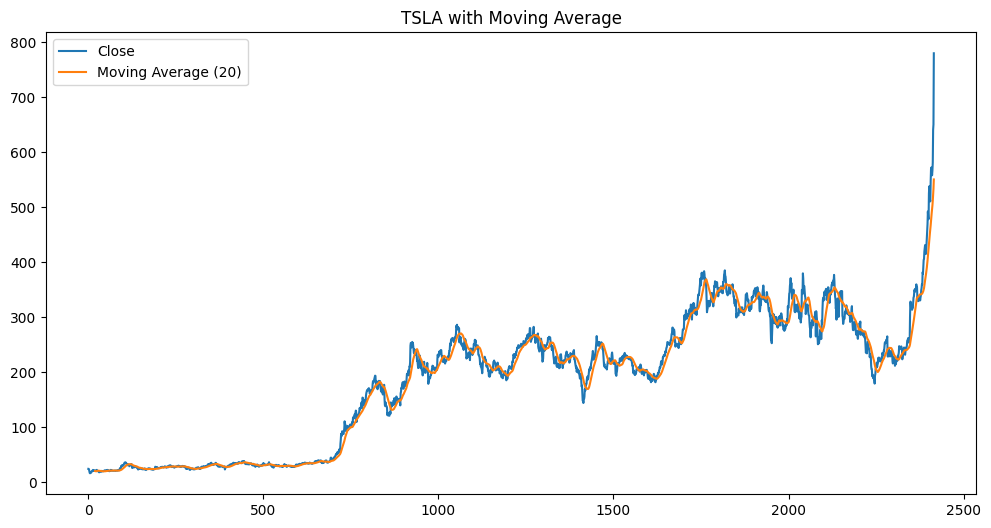

In [12]:
df['MA20'] = df['Close'].rolling(window=20).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close')
plt.plot(df['MA20'], label='Moving Average (20)')
plt.title('TSLA with Moving Average')
plt.legend()
plt.show()


In [15]:
df.to_csv("TSLA_cleaned.csv", index=False)
files.download("TSLA_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
readme_content = """
# 📈 Stock Price Trend Prediction with LSTM

This project uses an LSTM (Long Short-Term Memory) neural network to predict Tesla (TSLA) stock prices based on historical data.

## 🧠 Objective
Predict future stock prices using past trends with deep learning.

## 🛠 Tools & Libraries
- Python
- Keras (with TensorFlow backend)
- Pandas, NumPy
- Scikit-learn
- Matplotlib / Seaborn
- yfinance (optional)
- Streamlit (optional for dashboard)

## 📁 Files
- `TSLA_cleaned.csv`: Cleaned dataset used for training
- `lstm_model.ipynb`: Jupyter Notebook with full code
- `tsla_lstm_model.h5`: Trained LSTM model weights
- `README.md`: Project overview (this file)

## 🔄 Steps
1. Load and preprocess stock price data
2. Normalize data using MinMaxScaler
3. Create time-series sequences for LSTM
4. Build and train LSTM model
5. Predict and visualize results
6. (Optional) Add technical indicators like Moving Average and RSI
7. (Optional) Deploy with Streamlit

## 📊 Output
- Graph: Actual vs. Predicted prices
- RMSE evaluation metric

## ✅ Status
Project completed ✅
Ready for submission and presentation.
"""
with open("README.md", "w") as f:
    f.write(readme_content)
from google.colab import files
files.download("README.md")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>